<a href="https://colab.research.google.com/github/riomukhtarom/machine-learning/blob/master/association_rule_apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
data = pd.read_csv('/content/drive/My Drive/dataset/Market_Basket_Optimisation.csv', header=None, names=['item_'+str(i) for i in range(1,21)])
data.head()

In [5]:
# size of data
data.shape

(7501, 20)

In [6]:
# Counts of the number of baskets having 'n' items, (1 <= n <= 20)
basket_sizes = data.notna().apply(sum, axis=1).value_counts()
basket_sizes

1     1754
2     1358
3     1044
4      816
5      665
6      495
7      388
8      327
9      259
10     139
11     102
12      67
13      40
14      22
15      17
16       4
19       2
18       1
20       1
dtype: int64

In [7]:
# Total number of items purchased
items = data.melt().value.dropna().reset_index(drop=True)
print("A total of {:,} items were sold.".format(len(items)))

A total of 29,363 items were sold.


In [8]:
print("There were {} unique items:".format(items.nunique()))
items.unique()

There were 120 unique items:


array(['shrimp', 'burgers', 'chutney', 'turkey', 'mineral water',
       'low fat yogurt', 'whole wheat pasta', 'soup', 'frozen vegetables',
       'french fries', 'eggs', 'cookies', 'spaghetti', 'meatballs',
       'red wine', 'rice', 'parmesan cheese', 'ground beef',
       'sparkling water', 'herb & pepper', 'pickles', 'energy bar',
       'fresh tuna', 'escalope', 'avocado', 'tomato sauce',
       'clothes accessories', 'energy drink', 'chocolate',
       'grated cheese', 'yogurt cake', 'mint', 'asparagus', 'champagne',
       'ham', 'muffins', 'french wine', 'chicken', 'pasta', 'tomatoes',
       'pancakes', 'frozen smoothie', 'carrots', 'yams', 'shallot',
       'butter', 'light mayo', 'pepper', 'candy bars', 'cooking oil',
       'milk', 'green tea', 'bug spray', 'oil', 'olive oil', 'salmon',
       'cake', 'almonds', 'salt', 'strong cheese', 'hot dogs', 'pet food',
       'whole wheat rice', 'antioxydant juice', 'honey', 'sandwich',
       'salad', 'magazines', 'protein bar', '

## Data Analysis

In [9]:
item_counts = items.value_counts()
item_counts
# item_counts['mineral water']

mineral water    1788
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Name: value, Length: 120, dtype: int64

Text(0, 0.5, 'Count')

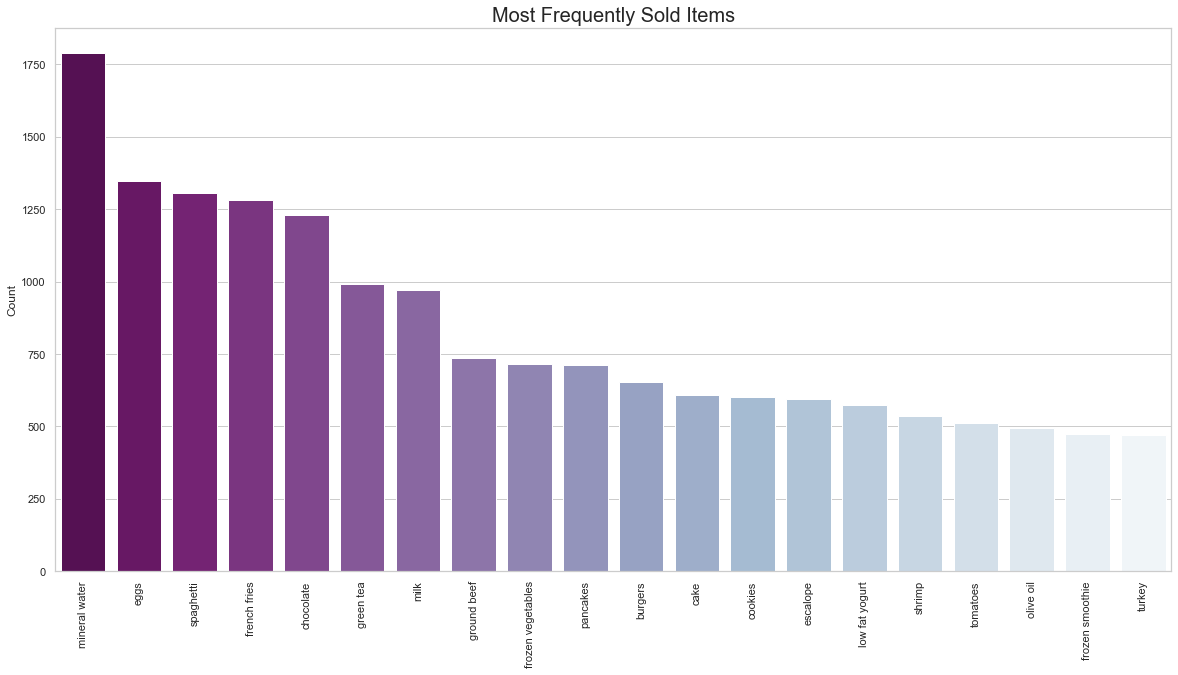

In [10]:
most_purchased = item_counts[:20]
plt.figure(figsize=(20,10))
sns.barplot(y=most_purchased, x=most_purchased.index, palette='BuPu_r')
plt.xticks(rotation=90)
plt.title('Most Frequently Sold Items', size=20)
plt.ylabel('Count')

Text(0.5, 1.0, 'Least Frequently Sold Items')

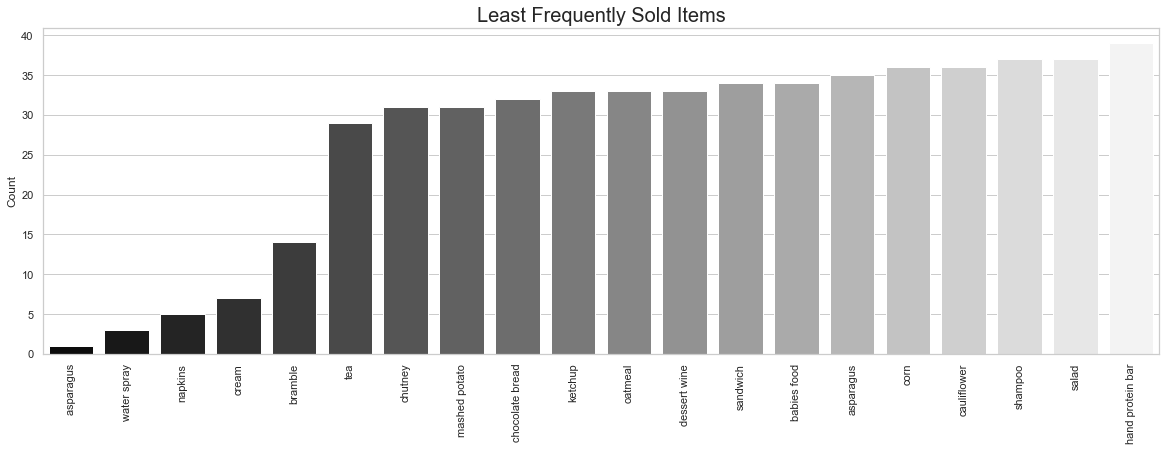

In [11]:
least_sold_items = items.value_counts()[-20:].sort_values()
plt.figure(figsize=(20,6))
sns.barplot(y=least_sold_items, x=least_sold_items.index, palette='binary_r')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title("Least Frequently Sold Items", size=20)

## Data Preprocessing

In [12]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [13]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.tail()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7500,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [14]:
# let's check the columns

data.columns

Index([' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado',
       'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=121)

In [15]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [16]:
data = data.drop(columns=['nan'])

## Apriori

In [17]:
from mlxtend.frequent_patterns import apriori

apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(milk, mineral water, ground beef)"
253,0.017064,"(spaghetti, mineral water, ground beef)"
254,0.015731,"(milk, spaghetti, mineral water)"
255,0.010265,"(spaghetti, mineral water, olive oil)"


In [18]:
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(milk, mineral water, ground beef)",3
253,0.017064,"(spaghetti, mineral water, ground beef)",3
254,0.015731,"(milk, spaghetti, mineral water)",3
255,0.010265,"(spaghetti, mineral water, olive oil)",3


In [19]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
240,0.013465,"(eggs, chocolate, mineral water)",3
241,0.010532,"(eggs, chocolate, spaghetti)",3
242,0.010932,"(chocolate, mineral water, ground beef)",3
243,0.013998,"(milk, chocolate, mineral water)",3
244,0.010932,"(milk, chocolate, spaghetti)",3
245,0.015865,"(chocolate, mineral water, spaghetti)",3
246,0.010132,"(eggs, mineral water, ground beef)",3
247,0.013065,"(eggs, milk, mineral water)",3
248,0.014265,"(eggs, spaghetti, mineral water)",3
249,0.010132,"(french fries, mineral water, spaghetti)",3


In [20]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
2,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921
3,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,0.004132,1.267198
4,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438
...,...,...,...,...,...,...,...,...,...
58,"(milk, mineral water)",(spaghetti),0.047994,0.174110,0.015731,0.327778,1.882589,0.007375,1.228597
59,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954
60,"(mineral water, olive oil)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071
61,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557


In [21]:
rules[ (rules['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
2,(cake),(mineral water),0.081056,0.238368,0.027463,0.338816,1.421397,0.008142,1.151921
3,(cereals),(mineral water),0.025730,0.238368,0.010265,0.398964,1.673729,0.004132,1.267198
4,(chicken),(mineral water),0.059992,0.238368,0.022797,0.380000,1.594172,0.008497,1.228438
...,...,...,...,...,...,...,...,...,...
58,"(milk, mineral water)",(spaghetti),0.047994,0.174110,0.015731,0.327778,1.882589,0.007375,1.228597
59,"(spaghetti, olive oil)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954
60,"(mineral water, olive oil)",(spaghetti),0.027596,0.174110,0.010265,0.371981,2.136468,0.005460,1.315071
61,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557
